# **Part-1: Implementation Using Eigenvectors and Eigenvalues:**

In this section, we will implement PCA from scratch using the eigenvectors and eigenvalues. In the next section, we will implement PCA using the PCA built-in function in sklearn. 

**Step-1: Import the Libraries:**

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn.decomposition import PCA
from tensorflow import keras

We will be using the following functions from numpy: mean, cov (for covariance), and eig (for eigenvectors and eigenvalues). Also, we will load the Iris dataset from sklearn. 

**Step-2: Load your Dataset:**

As I mentioned above, we will use the Iris dataset from sklearn. The Iris dataset is a labeled one, so we will drop the label and work only with the featurtes so that we would have unlabeled data for unsupervised learning. The Iris dataset has 4 features, namely: Sepal Length, Sepal Width, Petal Length and Petal Width. Hence, we have 4 PCs. We will find those 4 PCs, determine the number of PCs (K) needed to retain at least 97% of the variance, and then we project our data onto those PCs to reduce the number of features from 4 to K. 

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set for feature scaling by
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)
train_features = (X_train-train_mean) / train_std
test_features = (X_test-train_mean) / train_std

print("Training Features:")
print(train_features.shape)
print("Test Features:")
print(test_features.shape)

57026/57026 [==============================] - 0s 0us/step
Training Features:
(404, 13)
Test Features:
(102, 13)


**Question**

We can't visualize the data because it has 13 features



# **Part-2: Implementation Using the PCA Function:**

Now, I will repeat the same steps using the pca built-in function. **Step 1** and **Step 2** from above remain the same. We will only change in **Step 3**. Here, we will use the PCA function, and so we needed to import it from sklearn. 

**Step-3a: Find the PCs:**

In [4]:
# create the PCA instance
pca = PCA(13)
# fit on data
pca.fit(X_train)

PCA(n_components=13)

Remarks: 

1. I created an object pca. The number 4 is the same as my number of features in the original data because I want to show you all the PCs and their % of retained variance. 

2. After creating an object pca, we fit our data X. Note here that I used X as it is and not the normalized version (XN). PCA function takes the data unnormalized and it will normalize it then find the PCs. 

Let's take a look at the PCs and the % retained variance. 

In [7]:
print(pca.components_.T)
print(pca.explained_variance_ratio_)
print("Number of Principal Components: ", pca.n_components_)

[[ 3.12308679e-02  5.15990446e-03 -1.06105928e-02  2.60589099e-02
   9.70489427e-01 -1.62593605e-01  1.39202576e-01  1.01258135e-01
   9.93883969e-03  1.36789662e-02 -9.58241769e-04  1.49635528e-03
   5.74562187e-04]
 [-4.30823929e-02  4.09559606e-03  6.58947464e-01  7.45877976e-01
  -3.62654003e-03  4.95905468e-02  3.87102102e-02 -4.77387980e-02
   2.57968078e-02 -2.50838700e-02  6.06798895e-03 -1.12594144e-04
   2.49312962e-04]
 [ 2.75001553e-02 -5.45544220e-03 -9.15481112e-02 -4.41862275e-03
  -3.55485488e-02  3.13034561e-01  8.60840166e-01 -3.73056690e-01
   2.68830493e-02  1.00835447e-01 -1.98711684e-02 -6.19871330e-03
  -4.26661240e-03]
 [-7.05573349e-05 -2.43229556e-05 -9.28331946e-04  8.83578702e-04
  -1.12526379e-03 -7.68191645e-04  3.75776967e-03 -9.11081552e-03
  -1.75451543e-02  1.45359848e-03  1.13415862e-03  9.99765221e-01
  -7.59200189e-03]
 [ 4.61620804e-04 -5.78034219e-06 -1.79258880e-03  6.79083921e-04
  -3.40808045e-04  2.15525871e-03  4.74029082e-03 -3.07591610e-03


**Question**

We have 13 princpal componets in total as seen printed above.

**Step-3b: Find Proper K:**

Let's get a scree plot and cumulative plot. 

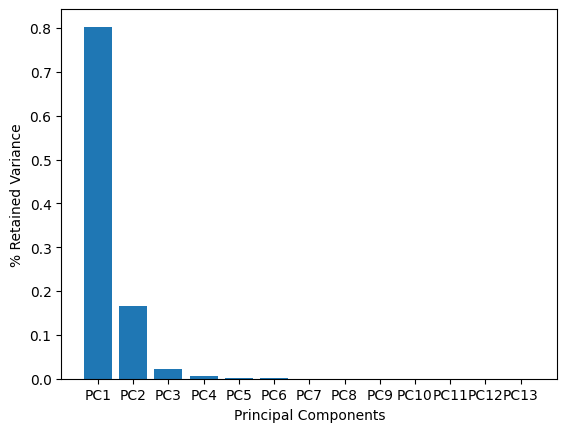

[8.02922466e-01 1.65306198e-01 2.18446408e-02 6.87538250e-03
 1.49975099e-03 7.71515324e-04 4.18301336e-04 2.35910239e-04
 8.98824909e-05 2.75863062e-05 6.84549648e-06 1.44215228e-06
 7.85949624e-08]


In [8]:
PC = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']
plt.bar(PC,pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('% Retained Variance')
plt.show()
print(pca.explained_variance_ratio_)

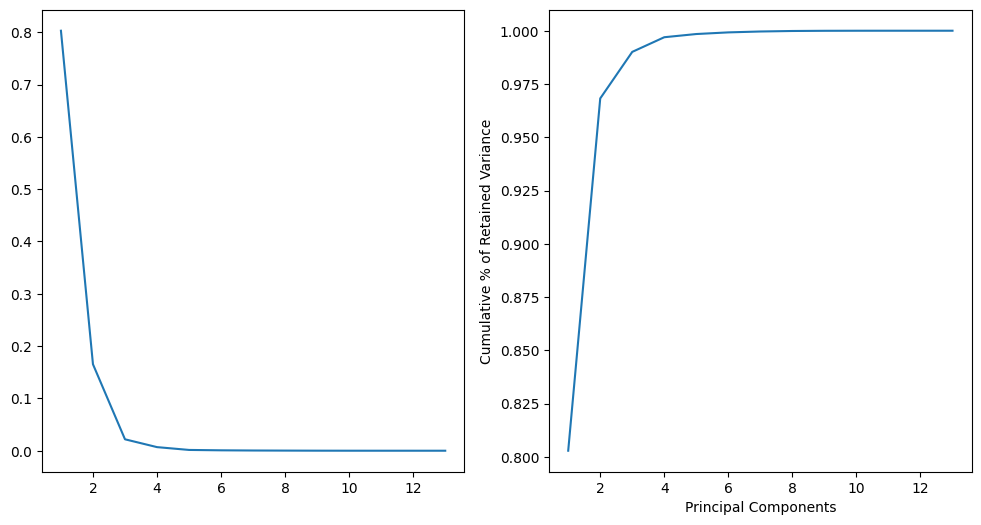

In [20]:
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
n_comp = np.arange(13)
n_comp = n_comp+1
cumulative = np.cumsum(pca.explained_variance_ratio_)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(n_comp,pca.explained_variance_ratio_)
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative % of Retained Variance')

ax[1].plot(n_comp,cumulative)
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative % of Retained Variance')
show()

**Question**

-We need at least one component to retain 80% variance

-We need at least two components to retain 95% variance

**Step-3c: Project your Data:**

In [15]:
pca2 = PCA(2)
pca2.fit(X_train)
X_P2 = pca2.transform(X_train)

print(X_P2.shape)
print(X_P2[0:5,:])

(404, 2)
[[-104.36910562   -8.05311754]
 [ -76.02182693  -18.43982088]
 [ 241.3079744  -104.74192144]
 [-187.44354309   19.68672346]
 [ 235.39436425 -119.56052905]]


In [17]:
print("Variance from 2 components: ", pca2.explained_variance_ratio_.sum())

Variance from 2 components:  0.9682286637902772


**Question**

With 2 components we retain 96.82% of the variance.